# Linear Operator

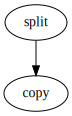

Sanity check passed, diff=0.0 rel_diff=0.0
torch.Size([1, 3, 768, 1024])


/media/exthdd/laizeqiang/lzq/projects/hyper-pnp/submit/Delta-Prox/dprox/utils/misc.py:57: FutureWarning: The input object of type 'tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  out = np.array(x)


ValueError: only one element tensors can be converted to Python scalars

In [1]:
import dprox as dp
from dprox.utils.examples import fspecial_gaussian
from dprox.utils import to_torch_tensor, imshow

from scipy.misc import face

x = dp.Variable()
point_spread_function = fspecial_gaussian(15, 5)
op = dp.conv(x, point_spread_function)

K = dp.CompGraph(op)
K.visualize()
K.sanity_check()

img = to_torch_tensor(face(), batch=True)
out = K.forward(img)

print(img.shape)
imshow(out)


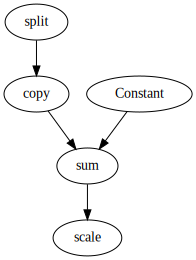

tensor([-3,  0,  3])
[Variable(id=e654b788-f2c5-11ed-8f8a-2cf05dadd712, shape=None, value=None)]
[Constant(value=somevalue)]
tensor([-3,  0,  3])
tensor([-6, -6, -6])


In [2]:
import torch

x = dp.Variable()
y = 3 * (x - torch.tensor([2, 2, 2]))

K = dp.CompGraph(y)
K.visualize()

input = torch.tensor([1, 2, 3])
print(dp.eval(y, input, zero_out_constant=False))

print(y.variables)
print(y.constants)

x.value = torch.tensor([1, 2, 3])
print(y.value)
print(y.offset)

Sanity check passed, diff=0.0 rel_diff=0.0
torch.Size([1, 3, 768, 1024])


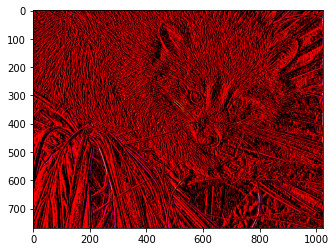

In [3]:

x = dp.Variable()
K = dp.CompGraph(dp.grad(x, dim=1) + dp.grad(x, dim=2))
K.sanity_check()
img = to_torch_tensor(face(), batch=True)
print(img.shape)
outputs = K.forward(img)
imshow(outputs*255)

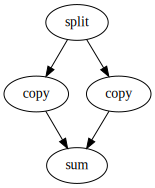

tensor([[ 0.5334,  0.2238,  0.5166, -0.1223],
        [ 2.7502, -0.4186,  0.3634,  0.8676],
        [ 2.9613,  0.6489,  0.8355, -0.3332],
        [-0.8194, -0.5701, -0.7394,  0.0103]], grad_fn=<AddBackward0>)
tensor([[0.2500, 0.2500, 0.2500, 0.2500],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])


In [4]:

x1 = dp.Variable()
x2 = dp.Variable()

K = dp.CompGraph(x1 + x2)
K.visualize()

v1 = torch.randn((4, 4), requires_grad=True)
v2 = torch.randn((4, 4))

outputs = K.forward(v1, v2)

print(outputs)

loss = torch.mean(outputs[0])
loss.backward()
print(v1.grad)

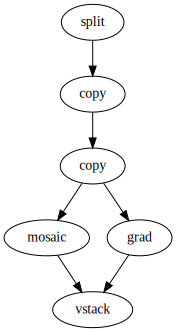

torch.Size([1, 3, 768, 1024])
torch.Size([1, 3, 768, 1024])


In [5]:
x = dp.Variable()
K = dp.CompGraph(dp.vstack([dp.mosaic(x), dp.grad(x)]))

K.visualize()

img = to_torch_tensor(face(), batch=True)
print(img.shape)

outputs = K.forward(img)
inputs = K.adjoint(outputs)
print(inputs.shape)
# K.sanity_check()

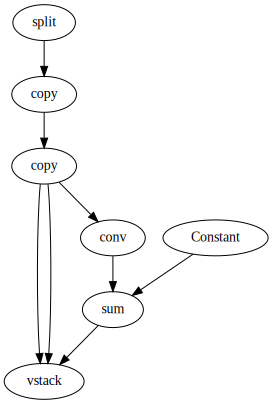

In [6]:
from dprox import *
from dprox.utils import *
from dprox.utils import examples

img = examples.sample('face')
psf = examples.point_spread_function(15, 5)
b = examples.blurring(img, psf)

x = Variable()
data_term = sum_squares(conv(x, psf) - b)
reg_term = deep_prior(x, denoiser='ffdnet_color')
reg2 = nonneg(x)
K = CompGraph(vstack([fn.linop for fn in [data_term, reg_term, reg2]]))
K.visualize()

In [7]:
K.forward(torch.zeros((1,3,36,36)))

AttributeError: 'NoneType' object has no attribute 'shape'